# Loading environment

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
color_palette = {
 'CTL01A': '#DBB807',
    'CTL08A': '#0FB248',
    'CTL04E': '#FF0054',
    'CTL02A': '#7B00FF',
'H9': '#72190E',
 'H1': '#994F88',
 'CTL05A': '#1965B0',
 'CTL07C': '#437DBF',
 'CTL06F': '#CAE0AB',
 'CTL09A': '#FFFF00',
 'KTD8.2': '#E65518',
 'UCSFi001-A': '#7BAFDE'}

# Load data

In [3]:
CBO_d02 = pd.read_csv('./data/csv/CBO_day02_fit.csv', index_col=0)
CBO_d26 = pd.read_csv('./data/csv/CBO_day26_fit.csv', index_col=0)
iPSC_cum_growth = pd.read_csv('./data/csv/iPSC_fitted_exp_area_sum_per_split.csv', index_col=0)
census_d5 = pd.read_csv('./data/csv/CensusSeq_combined_weighted_rank_d5.csv', index_col=0)
census_d12 = pd.read_csv('./data/csv/CensusSeq_combined_weighted_rank_d12.csv', index_col=0)
census_d25 = pd.read_csv('./data/csv/CensusSeq_combined_weighted_rank_d25.csv', index_col=0)
census_d50 = pd.read_csv('./data/csv/CensusSeq_combined_weighted_rank_d50.csv', index_col=0)

In [4]:
iPSC_cum_growth_mean = iPSC_cum_growth.groupby('Line')['rate'].mean().sort_index().rank()
iPSC_cum_growth_mean

Line
CTL01A        10.0
CTL02A         7.0
CTL04E         2.0
CTL05A         4.0
CTL06F        12.0
CTL07C         9.0
CTL08A         6.0
CTL09A        11.0
H1             1.0
H9             5.0
KTD8.2         3.0
UCSFi001-A     8.0
Name: rate, dtype: float64

In [5]:
census_d5['combined_scores'].rank()

CTL02A         1.0
H1             2.0
KTD8_2         3.0
CTL07C         4.0
CTL05A         5.0
CTL08A         6.0
CTL04E         7.0
CTL06F         8.0
CTL09A         9.0
H9            10.0
UCSFi001-A    11.0
CTL01A        12.0
Name: combined_scores, dtype: float64

## Prepare dataframe

In [6]:
ranks_df = pd.DataFrame({
    'Line': iPSC_cum_growth_mean.index,
    'iPSC_growth_rate': iPSC_cum_growth_mean.values,
    'CBO_velocity_0_2': CBO_d02['slope'].sort_index().rank().values,
    'CBO_velocity_2_6': CBO_d26['slope'].sort_index().rank().values,
    'CensusRank_d5': census_d5['combined_scores'].sort_index().rank().values,
    'CensusRank_d12': census_d12['combined_scores'].sort_index().rank().values,
    'CensusRank_d25': census_d25['combined_scores'].sort_index().rank().values,
    'CensusRank_d50': census_d50['combined_scores'].sort_index().rank().values,})

values_df = pd.DataFrame({
    'Line': iPSC_cum_growth_mean.index,
    'iPSC_growth_rate': iPSC_cum_growth.groupby('Line')['rate'].mean().sort_index().values,
    'CBO_velocity_0_2': CBO_d02['slope'].sort_index().values,
    'CBO_velocity_2_6': CBO_d26['slope'].sort_index().values,
    'CensusRank_d5': census_d5['combined_scores'].sort_index().values,
    'CensusRank_d12': census_d12['combined_scores'].sort_index().values,
    'CensusRank_d25': census_d25['combined_scores'].sort_index().values,
    'CensusRank_d50': census_d50['combined_scores'].sort_index().values,})

In [7]:
ranks_df.set_index('Line', inplace=True)

In [8]:
ranks_df_plot = pd.melt(ranks_df, ignore_index=False)
ranks_df_plot

,variable,value
Line,,
CTL01A,iPSC_growth_rate,10.0
CTL02A,iPSC_growth_rate,7.0
CTL04E,iPSC_growth_rate,2.0
CTL05A,iPSC_growth_rate,4.0
CTL06F,iPSC_growth_rate,12.0
...,...,...
CTL09A,CensusRank_d50,10.0
H1,CensusRank_d50,3.0
H9,CensusRank_d50,11.0


# Lineplots

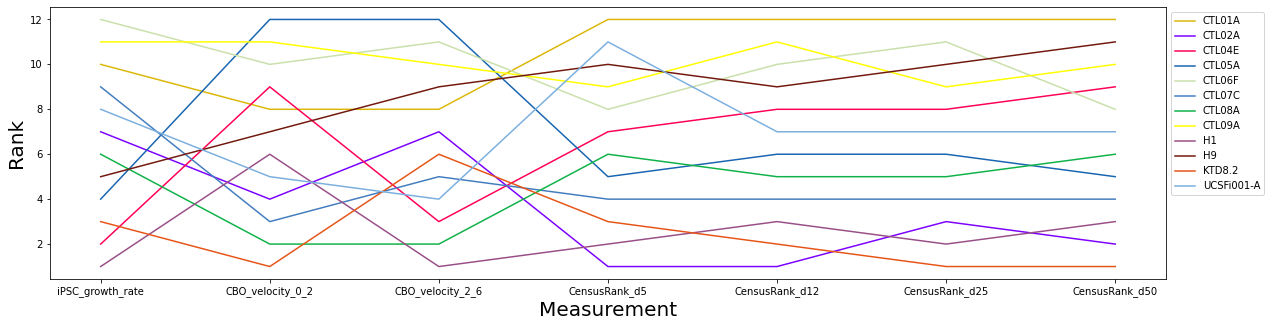

In [9]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.lineplot(data = ranks_df_plot, x = 'variable', y = 'value', hue = 'Line', palette=color_palette)
ax.set_xlabel('Measurement', fontdict={'size': 20})
ax.set_ylabel('Rank', fontdict={'size': 20})
_ = ax.legend(bbox_to_anchor = (1,1))

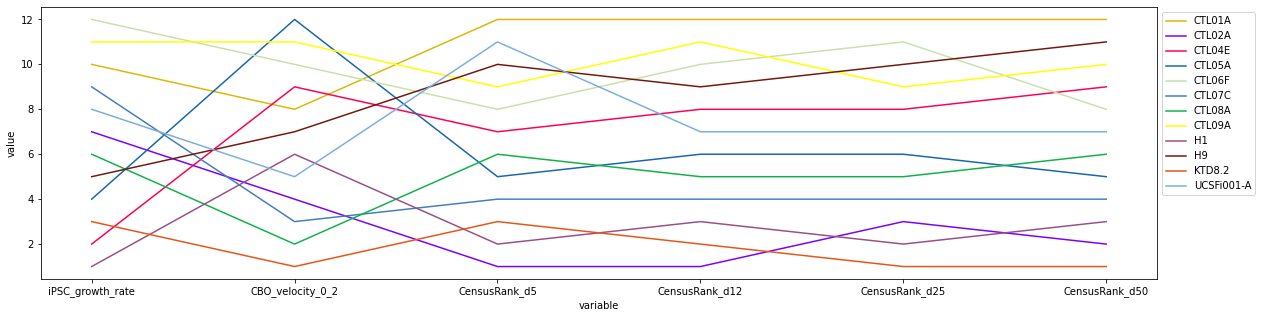

In [10]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.lineplot(data = ranks_df_plot[~ranks_df_plot.variable.isin(['CBO_velocity_2_6'])], x = 'variable', y = 'value', hue = 'Line', palette=color_palette)
_ = ax.legend(bbox_to_anchor = (1,1))

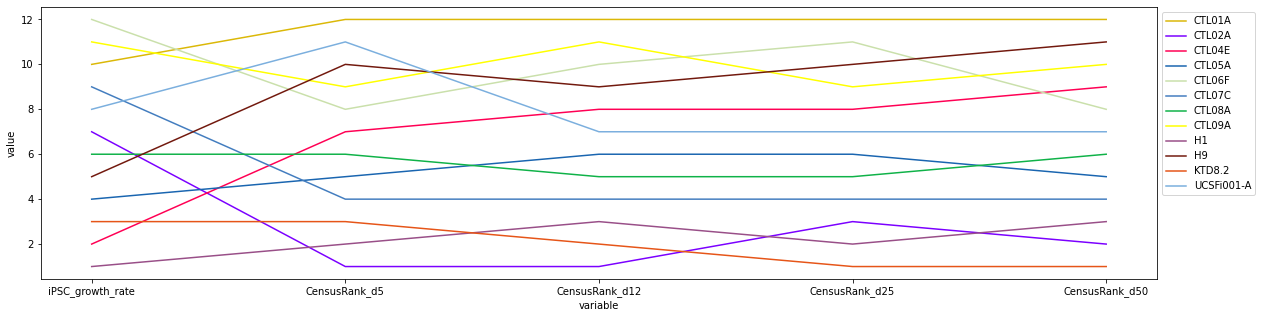

In [11]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.lineplot(data = ranks_df_plot[~ranks_df_plot.variable.isin(['CBO_velocity_0_2', 'CBO_velocity_2_6'])], x = 'variable', y = 'value', hue = 'Line', palette=color_palette)
_ = ax.legend(bbox_to_anchor = (1,1))

In [12]:
ranks_df_plot.variable.unique()

array(['iPSC_growth_rate', 'CBO_velocity_0_2', 'CBO_velocity_2_6',
       'CensusRank_d5', 'CensusRank_d12', 'CensusRank_d25',
       'CensusRank_d50'], dtype=object)

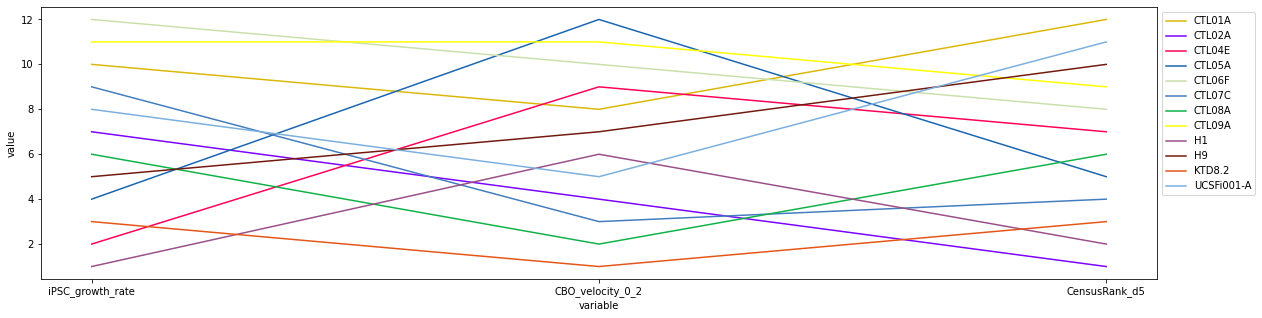

In [13]:

keep = ['iPSC_growth_rate', 'CBO_velocity_0_2', 
       'CensusRank_d5']

fig, ax = plt.subplots(figsize = (20, 5))
sns.lineplot(data = ranks_df_plot[ranks_df_plot.variable.isin(keep)], x = 'variable', y = 'value', hue = 'Line', palette=color_palette)
_ = ax.legend(bbox_to_anchor = (1,1))

# Heatmap

In [14]:
values_df.columns = ['Line', 'hPSC growth rate', 'CBO growth rate - Day 0-2', 'CBO growth rate - Day 2-6',
                     'Census-Seq rank - Day 5', 'Census-Seq rank - Day 12', 'Census-Seq rank - Day 25', 'Census-Seq rank - Day 50']

In [51]:
p_value < 0.0001

,hPSC growth rate,CBO growth rate - Day 0-2,CBO growth rate - Day 2-6,Census-Seq rank - Day 5,Census-Seq rank - Day 12,Census-Seq rank - Day 25,Census-Seq rank - Day 50
hPSC growth rate,True,False,False,False,False,False,False
CBO growth rate - Day 0-2,False,True,False,False,False,False,False
CBO growth rate - Day 2-6,False,False,True,False,False,False,False
Census-Seq rank - Day 5,False,False,False,True,True,False,True
Census-Seq rank - Day 12,False,False,False,True,True,True,True
Census-Seq rank - Day 25,False,False,False,False,True,True,True
Census-Seq rank - Day 50,False,False,False,True,True,True,True


In [56]:
p_value = pd.DataFrame(stats.spearmanr(values_df.drop('Line', axis  =1))[1], index = names, columns=names) 
p_value_copy = p_value.copy()
p_value_copy[p_value <= 0.05] = '*'
p_value_copy[p_value < 0.001] = '**'
p_value_copy[p_value < 0.0001] = '***'

p_value_copy[p_value > 0.05] = 'NS'

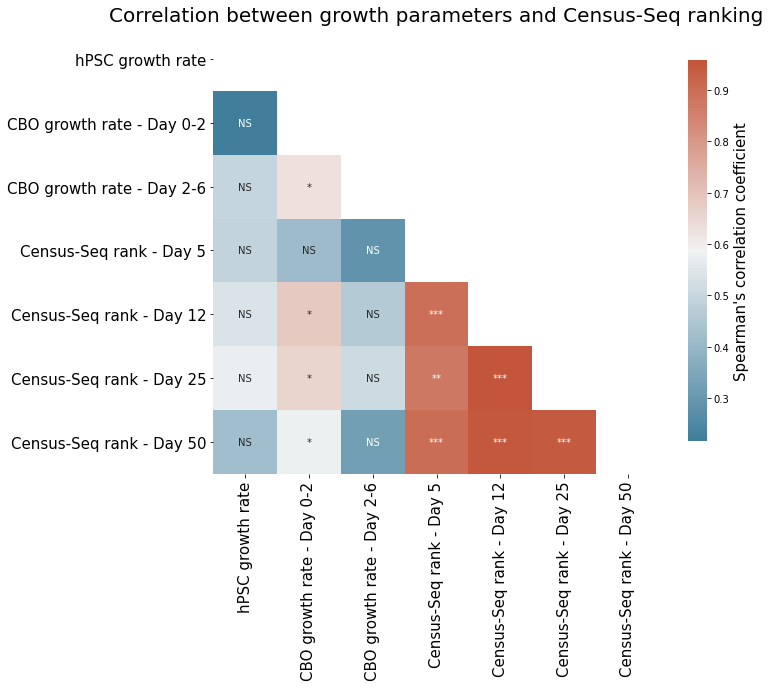

In [58]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(values_df.corr(), dtype=bool))

spearman = values_df.corr(method = 'spearman')


fig, ax = plt.subplots(figsize = (10, 10))
_ = sns.heatmap(spearman, cmap = cmap, mask = mask, square = True, 
                cbar_kws={'label': "Spearman's correlation coefficient", "shrink": 0.7}, annot = p_value_copy, fmt = '')
ax.figure.axes[-1].yaxis.label.set_size(15)
_ = ax.set_xticklabels(ax.get_xticklabels(), size = 15)
_ = ax.set_yticklabels(ax.get_yticklabels(), size = 15)
_ = ax.set_title("Correlation between growth parameters and Census-Seq ranking", fontdict={'size': 20})
plt.savefig('corr_matrix.svg', dpi = 300, bbox_inches = 'tight')

<AxesSubplot:>

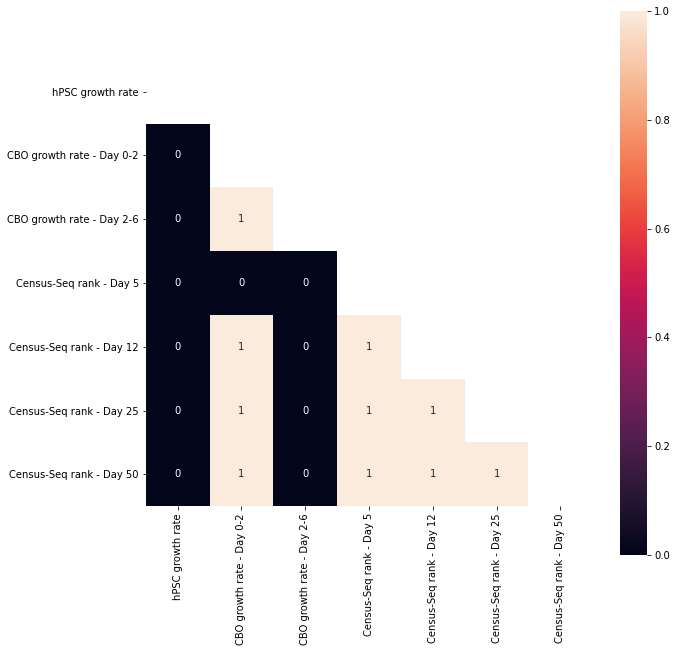

In [38]:
fig, ax = plt.subplots(figsize = (10, 10))

names = ['hPSC growth rate', 'CBO growth rate - Day 0-2', 'CBO growth rate - Day 2-6',
                     'Census-Seq rank - Day 5', 'Census-Seq rank - Day 12', 'Census-Seq rank - Day 25', 'Census-Seq rank - Day 50']

p_value = pd.DataFrame(stats.spearmanr(values_df.drop('Line', axis  =1))[1], index = names, columns=names) 

mask = np.triu(np.ones_like(p_value, dtype=bool))
sns.heatmap(p_value, annot = True, mask = mask, square=True)